In [18]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


LAB TASK 1

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

accuracies = []
for k in range(1, min(11, len(X_train_scaled))):  # ensure k ≤ training samples
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

print("Accuracies:", accuracies)
print("Best K =", accuracies.index(max(accuracies)) + 1)


Accuracies: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Best K = 1


LAB TASK 2



In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

iris = load_iris()
X = iris.data         
y = iris.target       


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def chi_squared_distance(x1, x2):
    return 0.5 * np.sum(((x1 - x2) ** 2) / (x1 + x2 + 1e-10)) 


def knn_predict(X_train, y_train, X_test, k=3):
    predictions = []
    for test_point in X_test:

        distances = [chi_squared_distance(test_point, x) for x in X_train]
        k_indices = np.argsort(distances)[:k]
        k_labels = [y_train[i] for i in k_indices]
        
        most_common = max(set(k_labels), key=k_labels.count)
        predictions.append(most_common)
    return np.array(predictions)

y_pred = knn_predict(X_train, y_train, X_test, k=5)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(" Accuracy:", round(acc * 100, 2), "%")
print("\nConfusion Matrix:\n", cm)


 Accuracy: 100.0 %

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


LAB TASK 3

In [19]:

df = pd.read_csv("Cancer.csv")

df.head()



,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


Dataset shape: (1000, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14 

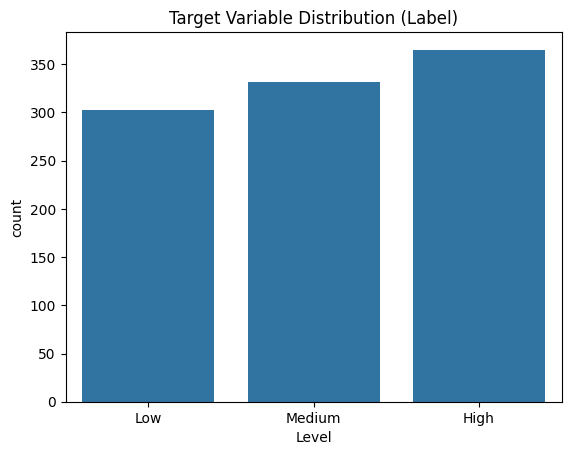

In [21]:

print("Dataset shape:", df.shape)
df.info()

df.describe()

sns.countplot(x='Level', data=df)
plt.title("Target Variable Distribution (Label)")
plt.show()


In [22]:

print("Missing values:\n", df.isnull().sum())

df = df.dropna()   
print("Duplicate records:", df.duplicated().sum())
df = df.drop_duplicates()

categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)


Missing values:
 index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64
Duplicate records: 0
Categorical columns: Index(['Patient Id', 'Level'], dtype='object')


                             index       Age    Gender  Air Pollution  \
index                     1.000000  0.002674 -0.025739       0.053307   
Age                       0.002674  1.000000 -0.202086       0.099494   
Gender                   -0.025739 -0.202086  1.000000      -0.246912   
Air Pollution             0.053307  0.099494 -0.246912       1.000000   
Alcohol use               0.041374  0.151742 -0.227636       0.747293   
Dust Allergy              0.037960  0.035202 -0.204312       0.637503   
OccuPational Hazards      0.032355  0.062177 -0.192343       0.608924   
Genetic Risk              0.030725  0.073151 -0.222727       0.705276   
chronic Lung Disease      0.025177  0.128952 -0.205061       0.626701   
Balanced Diet             0.030743  0.004863 -0.099741       0.524873   
Obesity                   0.050584  0.034337 -0.123813       0.601468   
Smoking                   0.018407  0.075333 -0.206924       0.481902   
Passive Smoker            0.019517  0.004908 -0.184

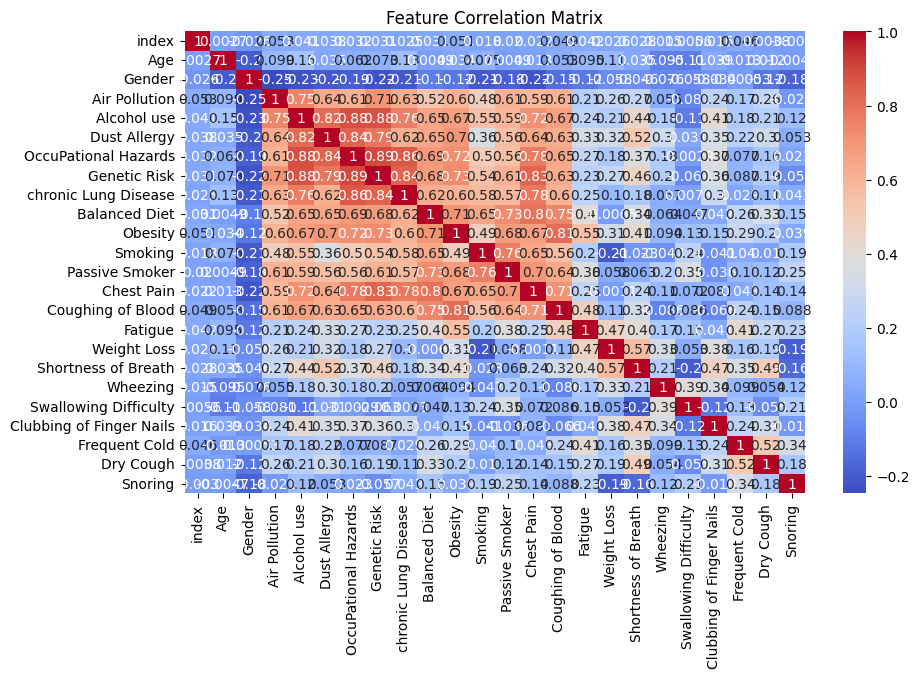

In [24]:
# Compute correlation matrix
corr = df.select_dtypes(include=['number']).corr()
print(corr)
# Visualize correlation
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# Drop features with very high correlation (threshold e.g. > 0.9)
corr_features = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.9:
            corr_features.add(corr.columns[i])
df.drop(columns=list(corr_features), inplace=True)


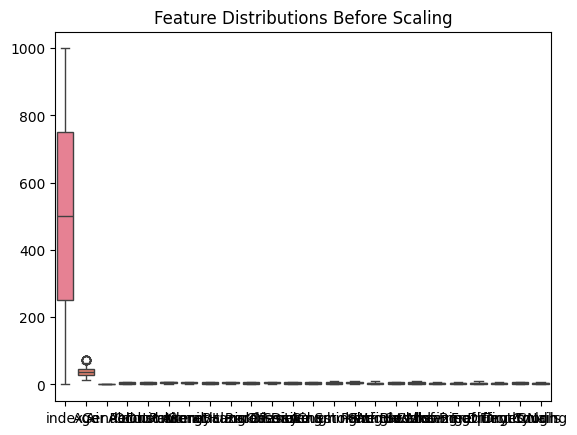

ValueError: could not convert string to float: 'P1'

In [28]:
# Separate features and label
X = df.drop(columns=['Level'])
y = df['Level']

# Check scaling need
sns.boxplot(data=X)
plt.title("Feature Distributions Before Scaling")
plt.show()

# Apply Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [29]:
# Split into Train (80%) and Test (20%)
X_train_full, X_test, y_train_full, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Further split train into Train (70%) and Validation (30%)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=0)

print("Train size:", X_train.shape)
print("Validation size:", X_val.shape)
print("Test size:", X_test.shape)


NameError: name 'X_scaled' is not defined

In [30]:
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
results = []

for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)

    train_acc = knn.score(X_train, y_train)
    val_acc = knn.score(X_val, y_val)
    test_acc = knn.score(X_test, y_test)

    results.append([metric, round(train_acc*100,2), round(val_acc*100,2), round(test_acc*100,2)])

# Display results
results_df = pd.DataFrame(results, columns=['Metric', 'Train Accuracy (%)', 'Validation Accuracy (%)', 'Test Accuracy (%)'])
print(results_df)


NameError: name 'X_val' is not defined